In [1]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli")

In [3]:
import pandas as pd
labels = open('data/classes.txt').read().splitlines()
all_df = pd.read_csv("data/belief_benchmark.csv")
all_df

,text,sentiment,label
0,Also use of chemicals and machinery on their p...,"NEGATIVE, NEGATIVE",1
1,Sources believe that twenty-five to 30 percent...,UNDETERMINED,0
2,Although these government-led initiatives are ...,UNDETERMINED,0
3,"In other projects of this kind, it is not alwa...",POSITIVE,2
4,Many African policy makers evidently believe t...,POSITIVE,2
...,...,...,...
358,Similar initiatives have and can be initiated ...,POSITIVE,2
359,Collective sales account for an average of 64 ...,UNDETERMINED,0
360,Individual sales account for slightly lower vo...,"UNDETERMINED, UNDETERMINED, UNDETERMINED",0
361,Modernization of the rice value chain The VC t...,UNDETERMINED,0


In [27]:
import numpy as np

labels = ["neither", "negative", "positive", "both"]
pred_i_list = []
for i,row in all_df.iterrows():
    pred = classifier(row["text"], candidate_labels=labels)
    pred_i = labels.index(pred["labels"][0])
    pred_i_list.append(pred_i)

In [28]:
from sklearn.metrics import classification_report

y_true = all_df["label"]
y_pred = pred_i_list
print(classification_report(y_true, y_pred, target_names=labels))

              precision    recall  f1-score   support

     neither       0.20      0.01      0.02       122
    negative       0.53      0.62      0.57        65
    positive       0.73      0.35      0.48       147
        both       0.05      0.38      0.09        29

    accuracy                           0.29       363
   macro avg       0.38      0.34      0.29       363
weighted avg       0.46      0.29      0.31       363



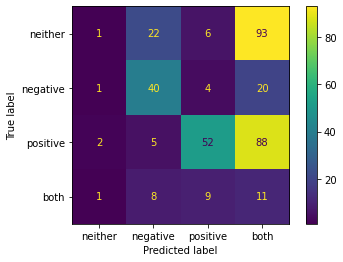

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
disp.plot()
plt.show()

In [33]:
# print(y_true[:10])
# print(y_pred[:10])
# import pickle
# pickle.dump(y_true, open("data/y_true", "wb"))
# pickle.dump(y_pred, open("data/y_pred", "wb"))


# load saved lists
y_true_loaded = pickle.load(open("data/y_true", "rb"))
y_pred_loaded = pickle.load(open("data/y_pred", "rb"))

0    1
1    0
2    0
3    2
4    2
5    3
6    1
7    0
8    3
9    2
Name: label, dtype: int64
[1, 3, 3, 2, 3, 3, 3, 3, 1, 3]
0      1
1      0
2      0
3      2
4      2
      ..
358    2
359    0
360    0
361    0
362    0
Name: label, Length: 363, dtype: int64
